# PCA and K-Means Worksheet

## Part 1 - PCA

### 1. PCA on IRIS Dataset

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance (2 PCs):", pca.explained_variance_ratio_.sum())

Original shape: (150, 4)
Transformed shape: (150, 2)
Explained variance ratio: [0.72962445 0.22850762]
Total explained variance (2 PCs): 0.9581320720000166


### 2. Variance-Based Component Selection

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)
print("Number of selected components:", pca.n_components_)
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))

Original shape: (569, 30)
Transformed shape: (569, 10)
Number of selected components: 10
Total explained variance: 0.9515688143366668


### 3. PCA Comparison With and Without Scaling

In [3]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wine = load_wine()
X = wine.data
y = wine.target

pca_no_scaling = PCA()
X_pca_no_scaling = pca_no_scaling.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_with_scaling = PCA()
X_pca_with_scaling = pca_with_scaling.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("\n--- PCA Without Scaling ---")
print("Explained variance ratio:")
print(pca_no_scaling.explained_variance_ratio_)
print("Total explained variance:", np.sum(pca_no_scaling.explained_variance_ratio_))

print("\n--- PCA With Scaling ---")
print("Explained variance ratio:")
print(pca_with_scaling.explained_variance_ratio_)
print("Total explained variance:", np.sum(pca_with_scaling.explained_variance_ratio_))

print("\nComparison:")
print("Without scaling, features with larger magnitudes dominate the principal components.")
print("With scaling, all features contribute more equally to the PCA.")

Original shape: (178, 13)

--- PCA Without Scaling ---
Explained variance ratio:
[9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06 2.80681456e-06 1.52308053e-06
 1.12783044e-06 7.21415811e-07 3.78060267e-07 2.12013755e-07
 8.25392788e-08]
Total explained variance: 1.0

--- PCA With Scaling ---
Explained variance ratio:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
Total explained variance: 1.0

Comparison:
Without scaling, features with larger magnitudes dominate the principal components.
With scaling, all features contribute more equally to the PCA.


### 4. PCA for Classification Improvement

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

RANDOM_STATE = 42
rng = np.random.default_rng(RANDOM_STATE)

X, y = make_classification(
    n_samples=1500,
    n_features=20,
    n_informative=8,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    class_sep=1.0,
    flip_y=0.02,
    random_state=RANDOM_STATE
)

noise = rng.normal(size=(X.shape[0], 10))
X_noisy = np.hstack([X, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_noisy, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=5000, random_state=RANDOM_STATE)
lr.fit(X_train_scaled, y_train)
y_pred_no_pca = lr.predict(X_test_scaled)
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)

pca = PCA(n_components=5, random_state=RANDOM_STATE)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

lr_pca = LogisticRegression(max_iter=5000, random_state=RANDOM_STATE)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("Data shape (with noise):", X_noisy.shape)
print("Accuracy WITHOUT PCA:", acc_no_pca)
print("Accuracy WITH PCA (5 components):", acc_pca)
print("Explained variance (5 PCs):", pca.explained_variance_ratio_.sum())

Data shape (with noise): (1500, 30)
Accuracy WITHOUT PCA: 0.7253333333333334
Accuracy WITH PCA (5 components): 0.664
Explained variance (5 PCs): 0.2911558102176688


### 5. PCA Component Interpretation

In [5]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_breast_cancer()
X = data.data
feature_names = np.array(data.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

pc1_loadings = pca.components_[0]

top5_idx = np.argsort(np.abs(pc1_loadings))[::-1][:5]

print("Top 5 features contributing to PC1 (by absolute loading):")
for rank, idx in enumerate(top5_idx, start=1):
    print(f"{rank}. {feature_names[idx]}: loading = {pc1_loadings[idx]:.6f} (abs = {abs(pc1_loadings[idx]):.6f})")

Top 5 features contributing to PC1 (by absolute loading):
1. mean concave points: loading = 0.260854 (abs = 0.260854)
2. mean concavity: loading = 0.258400 (abs = 0.258400)
3. worst concave points: loading = 0.250886 (abs = 0.250886)
4. mean compactness: loading = 0.239285 (abs = 0.239285)
5. worst perimeter: loading = 0.236640 (abs = 0.236640)


## Part 2 - K-Means Clustering

### 6. Basic K-Means

In [6]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

RANDOM_STATE = 42

X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.0,
    random_state=RANDOM_STATE
)

kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10)
kmeans.fit(X)

labels = kmeans.predict(X)

print("Cluster Centers:\n", kmeans.cluster_centers_)
print("\nInertia:", kmeans.inertia_)
print("\nFirst 10 predicted labels:", labels[:10])

Cluster Centers:
 [[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]

Inertia: 566.8595511244134

First 10 predicted labels: [1 1 0 2 1 2 0 2 0 0]


### 7. Elbow Method

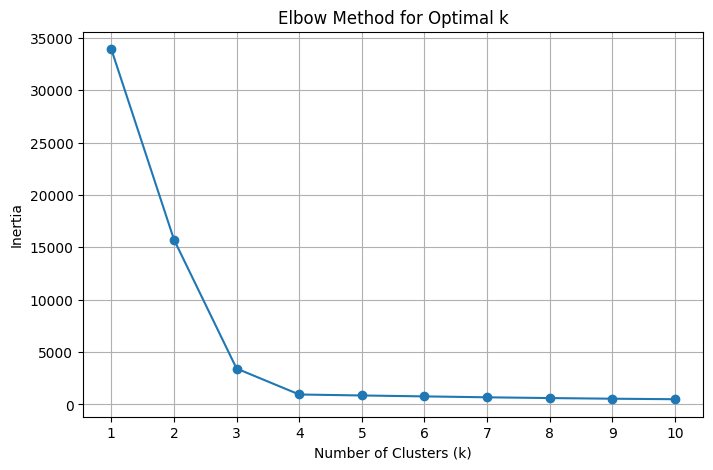

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

RANDOM_STATE = 42

X, y = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1.0,
    random_state=RANDOM_STATE
)

inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.grid(True)
plt.show()

### 8. Effect of Initialization

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.0,
    random_state=0
)

kmeans_no_seed = KMeans(n_clusters=3, n_init=10)
kmeans_no_seed.fit(X)

kmeans_seed = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_seed.fit(X)

print("Cluster Centers WITHOUT random_state:\n")
print(kmeans_no_seed.cluster_centers_)

print("\nCluster Centers WITH random_state=42:\n")
print(kmeans_seed.cluster_centers_)

print("\nInertia WITHOUT random_state:", kmeans_no_seed.inertia_)
print("Inertia WITH random_state=42:", kmeans_seed.inertia_)

Cluster Centers WITHOUT random_state:

[[ 0.86154094  4.42239013]
 [ 1.87178417  0.76251893]
 [-1.80361336  2.78753988]]

Cluster Centers WITH random_state=42:

[[ 0.86819253  4.43996047]
 [-1.78246565  2.78528143]
 [ 1.87178417  0.76251893]]

Inertia WITHOUT random_state: 536.4262880292933
Inertia WITH random_state=42: 536.3679419960303


### 9. K-Means on Iris Dataset

In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode

iris = load_iris()
X = iris.data
y_true = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

labels = np.zeros_like(y_pred)

for i in range(3):
    mask = (y_pred == i)
    labels[mask] = mode(y_true[mask], keepdims=True)[0]

accuracy = accuracy_score(y_true, labels)

print("First 10 predicted cluster labels:", y_pred[:10])
print("First 10 mapped labels:", labels[:10])
print("Accuracy score:", accuracy)

First 10 predicted cluster labels: [1 1 1 1 1 1 1 1 1 1]
First 10 mapped labels: [0 0 0 0 0 0 0 0 0 0]
Accuracy score: 0.8333333333333334


## Part 3 - PCA + K-Means Combined

### 10. Clustering With and Without PCA

In [10]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

RANDOM_STATE = 42

wine = load_wine()
X = wine.data
y_true = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3

kmeans_direct = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
labels_direct = kmeans_direct.fit_predict(X_scaled)

inertia_direct = kmeans_direct.inertia_
sil_direct = silhouette_score(X_scaled, labels_direct)

pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca2 = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca2)

inertia_pca = kmeans_pca.inertia_
sil_pca = silhouette_score(X_pca2, labels_pca)

print("=== KMeans directly on scaled features ===")
print("Inertia:", inertia_direct)
print("Silhouette score:", sil_direct)

print("\n=== PCA (2 components) + KMeans ===")
print("Inertia:", inertia_pca)
print("Silhouette score:", sil_pca)

print("\nPCA explained variance (2 components):", pca.explained_variance_ratio_.sum())

=== KMeans directly on scaled features ===
Inertia: 1277.928488844643
Silhouette score: 0.2848589191898987

=== PCA (2 components) + KMeans ===
Inertia: 259.5093807511935
Silhouette score: 0.5610505693103246

PCA explained variance (2 components): 0.5540633835693526


### 11. High-Dimensional Dataset

In [11]:
import time
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

RANDOM_STATE = 42

digits = load_digits()
X = digits.data
y_true = digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10

def run_kmeans(X_in, name):
    start = time.perf_counter()
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    labels = kmeans.fit_predict(X_in)
    runtime = time.perf_counter() - start

    inertia = kmeans.inertia_

    sil = silhouette_score(X_in, labels)

    print(f"\n=== {name} ===")
    print("Shape:", X_in.shape)
    print("Runtime (seconds):", runtime)
    print("Inertia:", inertia)
    print("Silhouette score:", sil)

    return runtime, inertia, sil

rt_no_pca, in_no_pca, sil_no_pca = run_kmeans(X_scaled, "KMeans WITHOUT PCA")

pca = PCA(n_components=0.95, random_state=RANDOM_STATE)
start_pca = time.perf_counter()
X_pca = pca.fit_transform(X_scaled)
pca_time = time.perf_counter() - start_pca

rt_pca_km, in_pca_km, sil_pca_km = run_kmeans(X_pca, "PCA(95% var) + KMeans")

print("\n=== Summary ===")
print("PCA components selected:", pca.n_components_)
print("PCA explained variance:", pca.explained_variance_ratio_.sum())
print("PCA transform time (seconds):", pca_time)

print("\nKMeans WITHOUT PCA -> runtime:", rt_no_pca, "| inertia:", in_no_pca, "| silhouette:", sil_no_pca)
print("PCA + KMeans         -> runtime:", rt_pca_km, "| inertia:", in_pca_km, "| silhouette:", sil_pca_km)
print("Total time with PCA (PCA + KMeans):", pca_time + rt_pca_km)


=== KMeans WITHOUT PCA ===
Shape: (1797, 64)
Runtime (seconds): 0.6349295679999614
Inertia: 69813.55913652515
Silhouette score: 0.13937726851699628

=== PCA(95% var) + KMeans ===
Shape: (1797, 40)
Runtime (seconds): 0.48281084799987184
Inertia: 64324.16034087832
Silhouette score: 0.1594709946518017

=== Summary ===
PCA components selected: 40
PCA explained variance: 0.9507791125066463
PCA transform time (seconds): 0.09231417799992414

KMeans WITHOUT PCA -> runtime: 0.6349295679999614 | inertia: 69813.55913652515 | silhouette: 0.13937726851699628
PCA + KMeans         -> runtime: 0.48281084799987184 | inertia: 64324.16034087832 | silhouette: 0.1594709946518017
Total time with PCA (PCA + KMeans): 0.575125025999796


### 12. Pipeline Implementation

In [12]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

RANDOM_STATE = 42

wine = load_wine()
X = wine.data

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2, random_state=RANDOM_STATE)),
    ("kmeans", KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10))
])

pipeline.fit(X)

kmeans_model = pipeline.named_steps["kmeans"]
pca_model = pipeline.named_steps["pca"]

print("PCA explained variance (2 components):", pca_model.explained_variance_ratio_.sum())
print("\nFinal cluster centers (in PCA 2D space):\n")
print(kmeans_model.cluster_centers_)

PCA explained variance (2 components): 0.5540633835693526

Final cluster centers (in PCA 2D space):

[[ 2.26614991  0.86559213]
 [-2.74392982  1.2141906 ]
 [-0.16278513 -1.76758824]]
